# ih_datamadpt0420_project_m2
# DIAMONDS ANALYSIS

## ANALYSIS OF THE DATA

In [294]:
#Importation of libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
#Get data
diamonds = pd.read_csv('data/diamonds_train.csv')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


In [296]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


### Data in table:
Carat: The weight of the diamond.

Cut: Quality of the angles, proportions, facets, and finishing details.

Color: How colorless the diamond is. 

Clarity: How clean the diamond is of inclusions and blemishes.

Depth: Measurement from top to bottom, expressed as a percentage.

Table: It is the width of the flat facet on its surface, expressed as a percentage.

Price: Price in USD

x, y, z: measures

In [297]:
#No null values --> Al data usefull
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [298]:
diamonds.dtypes
#Useful data types

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [299]:
#Measurements as x, y and z are difficult to use by themselves, thus let's create a 'volume' column
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

A slight analysis of the non numerical features would be useful.

## CUT

In [300]:
diamonds['cut'].unique()

array(['Premium', 'Very Good', 'Fair', 'Good', 'Ideal'], dtype=object)

In [301]:
#Let's consider the order from worst to best: Fair --> Good --> Very Good --> Premium --> Ideal
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [302]:
diamonds['cut'].value_counts()
#Best cuts are the most common

Ideal        16220
Premium      10260
Very Good     9095
Good          3663
Fair          1217
Name: cut, dtype: int64

## COLOR

In [303]:
diamonds['color'].unique()

array(['J', 'H', 'G', 'D', 'F', 'E', 'I'], dtype=object)

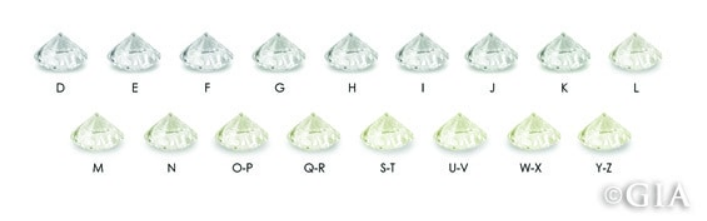

In [304]:
#from worst to best (colour to colourless): J --> I--> H --> G --> F --> E --> D  (D is colourless)

color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [305]:
diamonds['color'].value_counts()

G    8455
E    7325
F    7177
H    6277
D    5049
I    4032
J    2140
Name: color, dtype: int64

## CLARITY

In [306]:
diamonds['clarity'].unique()

array(['VS2', 'VS1', 'SI1', 'SI2', 'IF', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

In [307]:
'''
The meaning of these acronyms is:

FL (Flawless)
IF (Internally Flawless)
VVS1 (Very, Very Slightly Included 1)
VVS2 (Very, Very Slightly Included 2)
VS1 (Very Slightly Included 1)
VS2 (Very Slightly Included 2)
SI1 (Slightly Included 1)
SI2 (Slightly Included 2)
I1 (Inclusions 1)
I2 (Inclusions 2)

So our data in order from worst to best: I1 --> SI2 --> SI1 --> VS2 --> VS1 --> VVS2 --> VVS1 --> IF
'''
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [308]:
diamonds['clarity'].value_counts()

SI1     9749
VS2     9248
SI2     6929
VS1     6066
VVS2    3799
VVS1    2774
IF      1327
I1       563
Name: clarity, dtype: int64

## Correlation matrix
With this matrix of graphs we can see easily if there is a clear relationship between the different features. This can help us to start the study.

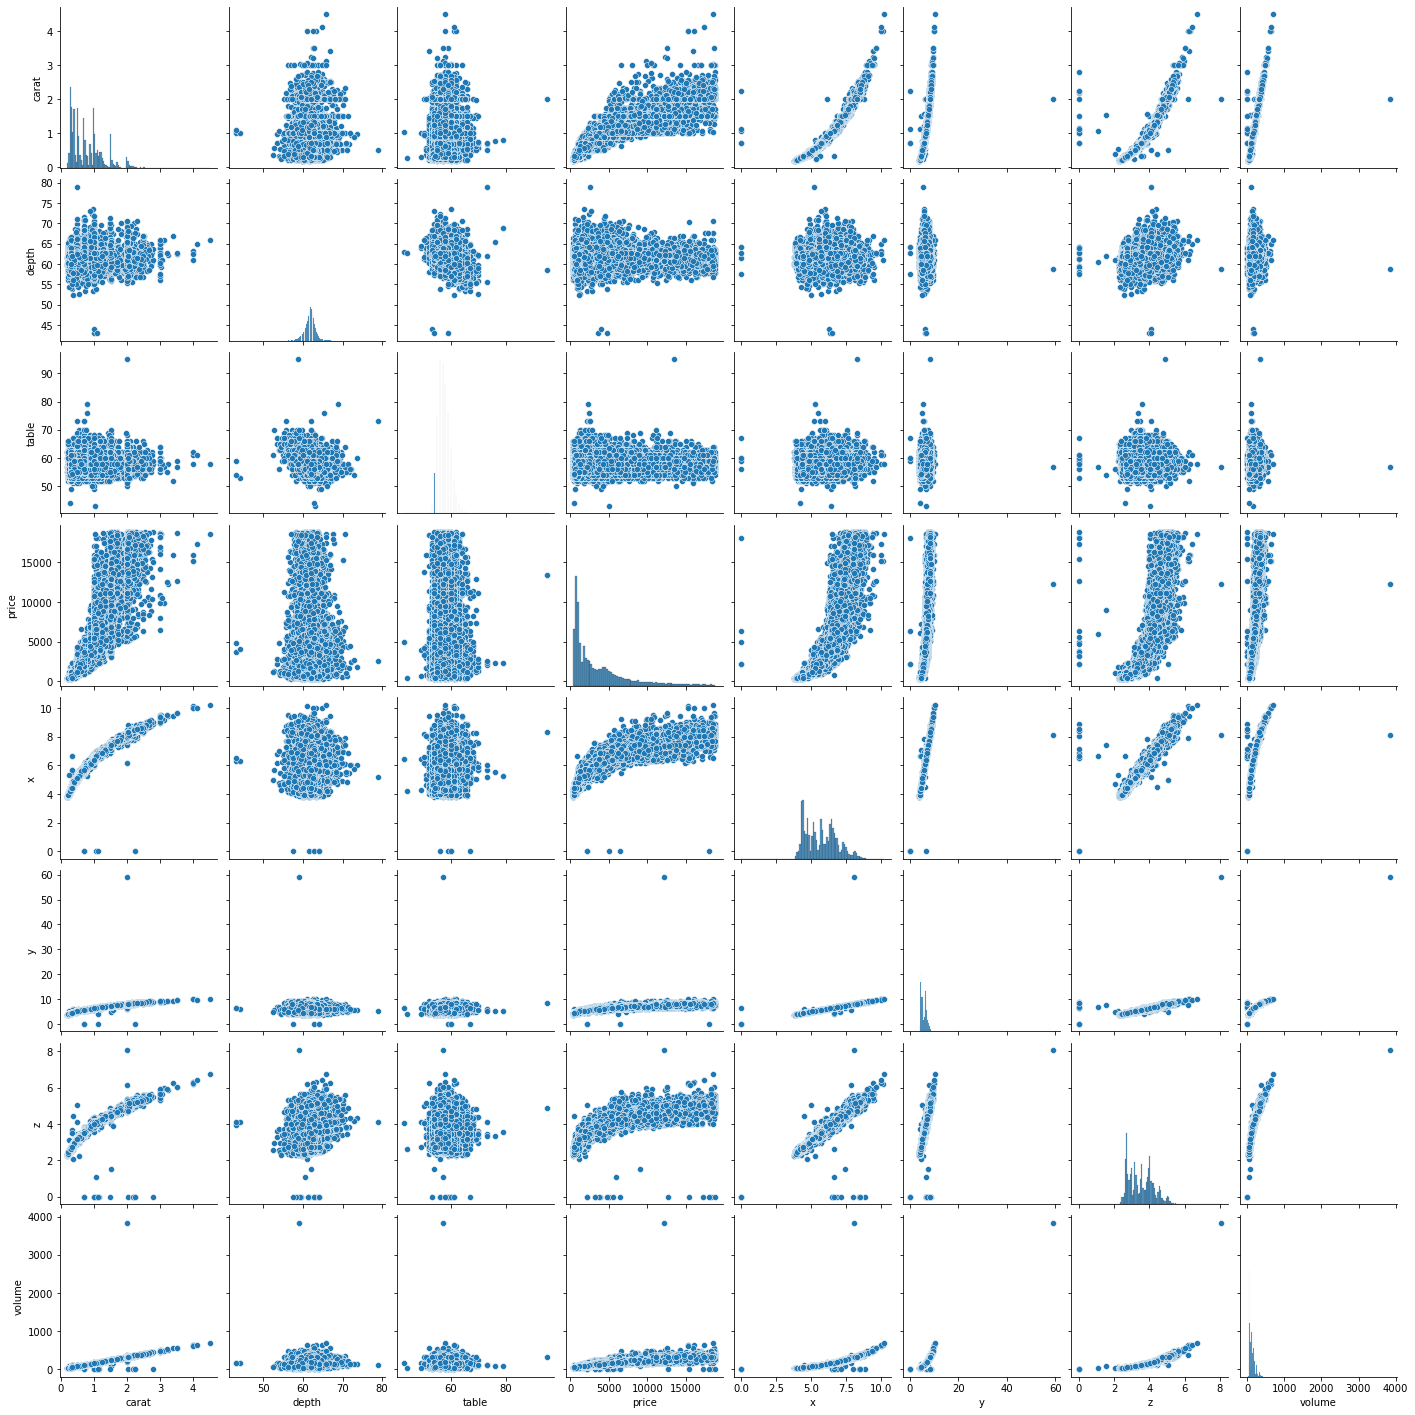

In [309]:
sns.pairplot(diamonds);

# PRICE COMPARATIVE

The price is one of the most remarkables features in a diamond. 

A first analysis is going to be done, comparing each feature with the price, in order to find any relationship.

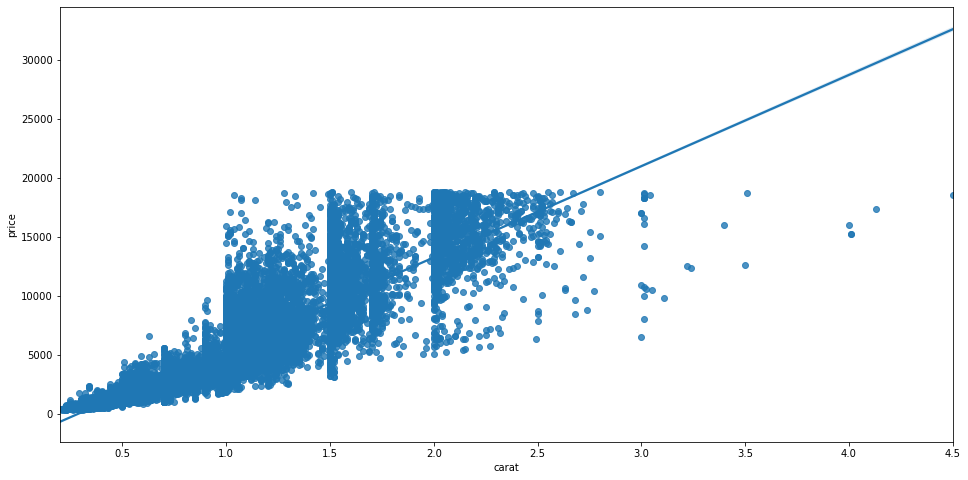

In [310]:
#Considering the Carat
fig, ax = plt.subplots(figsize = (16,8))
sns.regplot(data=diamonds, x="carat", y="price", ax = ax);

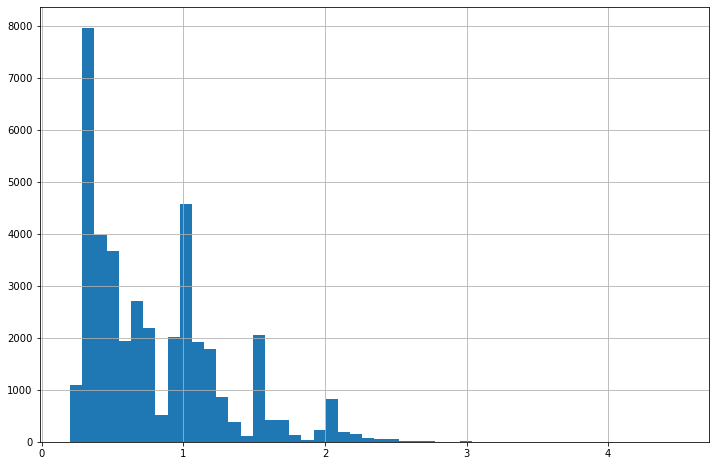

In [311]:
#Distribution of the diamonds by carat
diamonds['carat'].hist(bins = 50, figsize = (12, 8));

In [312]:
#Considering the cut
cut_price = diamonds[['cut', 'price']].groupby(['cut']).agg('mean').reindex(cut_order)
cut_price


,price
cut,
Fair,4333.271980
Good,3880.611794
Very Good,3994.444420
Premium,4617.322612
Ideal,3436.112577


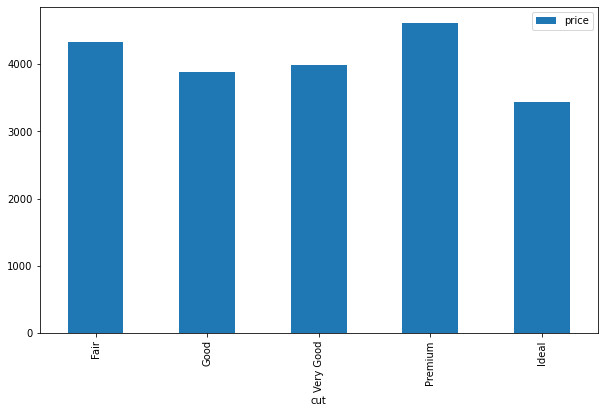

In [313]:
fig, ax = plt.subplots(figsize = (10,6))

cut_price.plot.bar(ax=ax);

In [314]:
#Considering the color
color_price = diamonds[['color', 'price']].groupby(['color']).agg('mean').reindex(color_order)
color_price

,price
color,
J,5346.234112
I,5090.868800
H,4476.469014
G,4023.214902
F,3677.355720
E,3088.342526
D,3134.943157


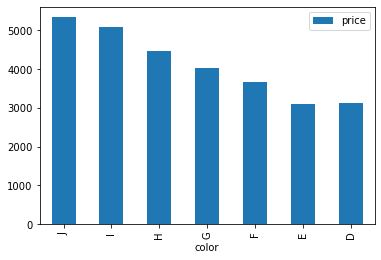

In [315]:
color_price.plot.bar();
#Curiously, the most transparent color that is supposedly the most appreciate, is the less expensive

In [316]:
#Considering the clarity
clarity_price = diamonds[['clarity', 'price']].groupby(['clarity']).agg('mean').reindex(clarity_order)
clarity_price

,price
clarity,
I1,3971.206039
SI2,5101.044307
SI1,3999.856908
VS2,3913.590182
VS1,3796.813551
VVS2,3240.978942
VVS1,2559.498558
IF,2797.897513


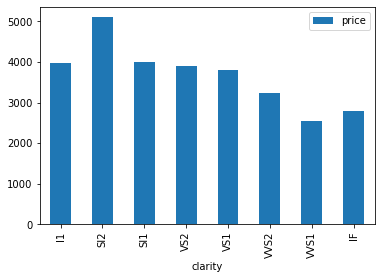

In [317]:
clarity_price.plot.bar();

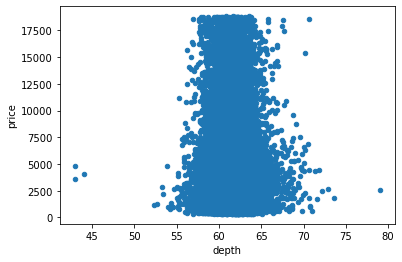

In [318]:
#Considering the depth
diamonds.plot.scatter(x = 'depth', y = 'price');

In [319]:
#Filtering the outliers to have a better conclusion
filt_depth1 = diamonds['depth'] < 74 
filt_depth2 = diamonds['depth'] > 50
filt_depth = filt_depth1 & filt_depth2
diamonds_depth = diamonds[filt_depth]

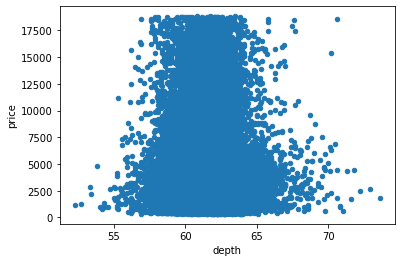

In [320]:
diamonds_depth.plot.scatter(x = 'depth', y = 'price');

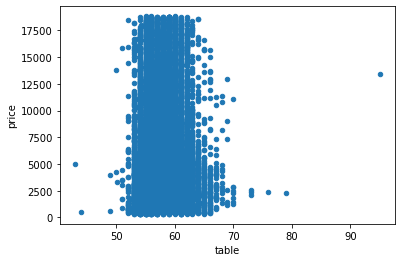

In [321]:
#Considering the table
diamonds.plot.scatter(x = 'table', y = 'price');

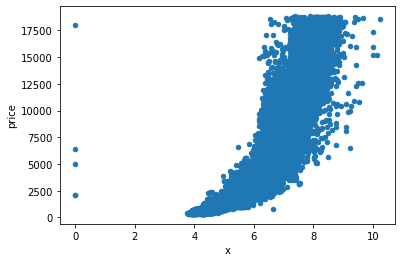

In [322]:
#Considering the 'x' parameter
diamonds.plot.scatter(x = 'x', y = 'price');

In [323]:
#Filtering the outliers to have a better conclusion
filt_x = diamonds['x'] > 3
diamonds_x = diamonds[filt_x]

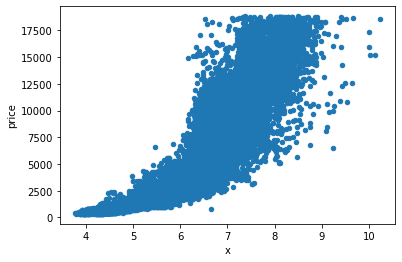

In [324]:
diamonds_x.plot.scatter(x = 'x', y = 'price');

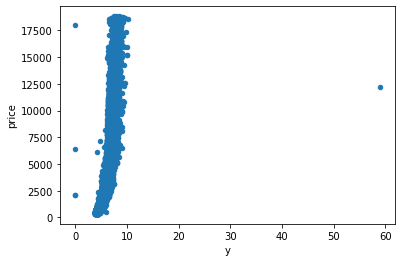

In [325]:
#Considering the 'y' parameter
diamonds.plot.scatter(x = 'y', y = 'price');

In [326]:
#Filtering the outliers to have a better conclusion
filt_y1 = diamonds['y'] < 20
filt_y2 = diamonds['y'] > 3
filt_y = filt_y1 & filt_y2
diamonds_y = diamonds[filt_y]

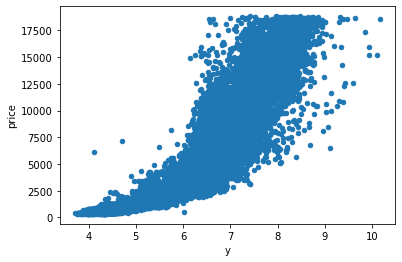

In [327]:
diamonds_y.plot.scatter(x = 'y', y = 'price');

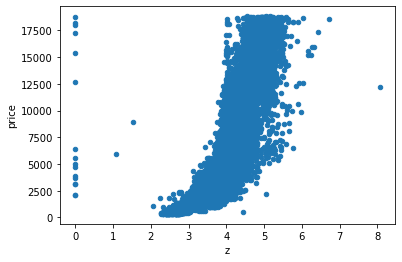

In [328]:
#Considering the 'z' parameter
diamonds.plot.scatter(x = 'z', y = 'price');

In [329]:
#Filtering the outliers to have a better conclusion
filt_z1 = diamonds['z'] < 7
filt_z2 = diamonds['z'] > 2
filt_z= filt_z1 & filt_z2
diamonds_z = diamonds[filt_z]

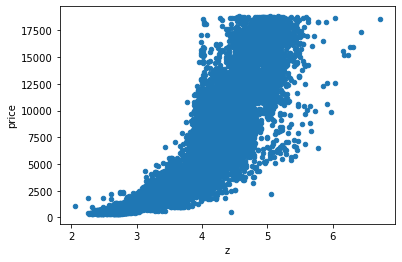

In [330]:
diamonds_z.plot.scatter(x = 'z', y = 'price');

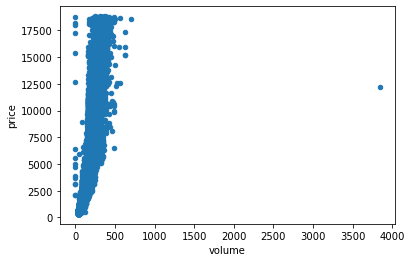

In [331]:
diamonds.plot.scatter(x = 'volume', y = 'price');

In [332]:
#Filtering the outliers to have a better conclusion
filt_volume1 = diamonds['volume'] < 500
filt_volume2 = diamonds['volume'] > 2
filt_volume= filt_volume1 & filt_volume2
diamonds_volume = diamonds[filt_volume]

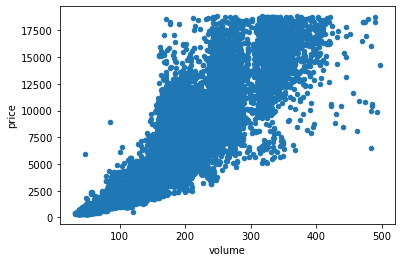

In [333]:
diamonds_volume.plot.scatter(x = 'volume', y = 'price');

In [334]:
#Some kind of gap of values is found between 250 and 350 mm3
filt_volume1 = diamonds['volume'] < 350
filt_volume2 = diamonds['volume'] > 250
filt_volume= filt_volume1 & filt_volume2
diamonds_volume = diamonds[filt_volume]

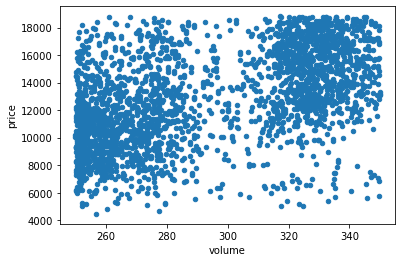

In [335]:
diamonds_volume.plot.scatter(x = 'volume', y = 'price');

Ater this initial analysis we can see that only some features are independent of other parmeters, and linear with the price.

These features are the carat and the measures x, y and z (and consequently the volume). The color is lineal with the price but inverse (the brightest color has a lower average price).  

The rest of features would be dependent of other parameters, so let's make some tests combining them, in order to get some clear conclusions.

## ANALYSIS COLOR vs CUT 

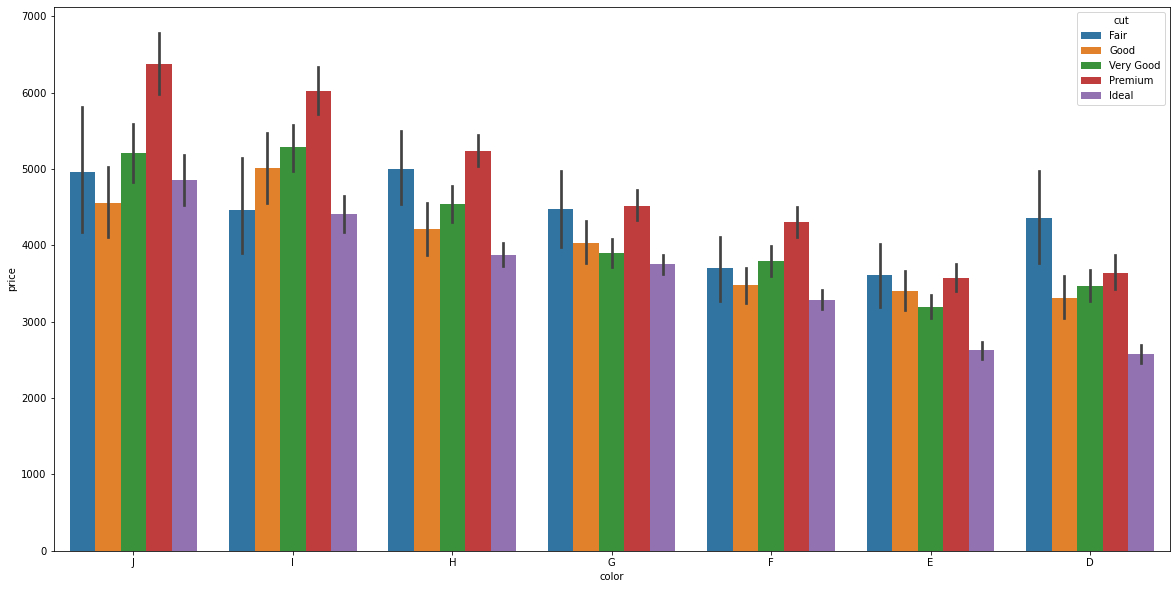

In [336]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data= diamonds, x= 'color', y= 'price', hue= 'cut', ax = ax, order = color_order, hue_order = cut_order);

In general, it seems that the fact to have some color makes the diamond more valuable than the colorless (D).

The second best cut (Premium) in all categories of color has the highest average price, instead of cut 'Ideal', that is supposed to be the best

This statement do not happens for color D, where the 'Fair' cut is the more expensive. Maybe related with their rarity, as we can see in the following graph.


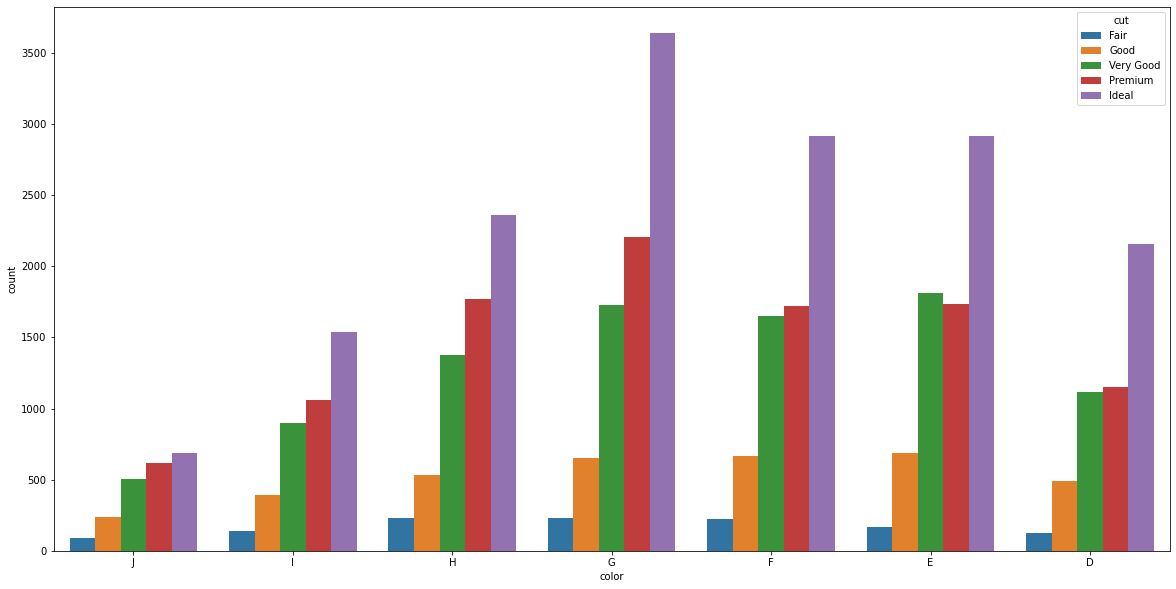

In [337]:
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data= diamonds, x= 'color', hue= 'cut', ax = ax, order = color_order, hue_order = cut_order);

The 'Ideal' cut is the most common. Maybe that is the fact that makes it not as expensive as 'Premium' cut. A big amount of this kind of cut could reduce the exclusivity, that is in line with the price. However this fact has not sense. A comparative with the carat would be usefull:

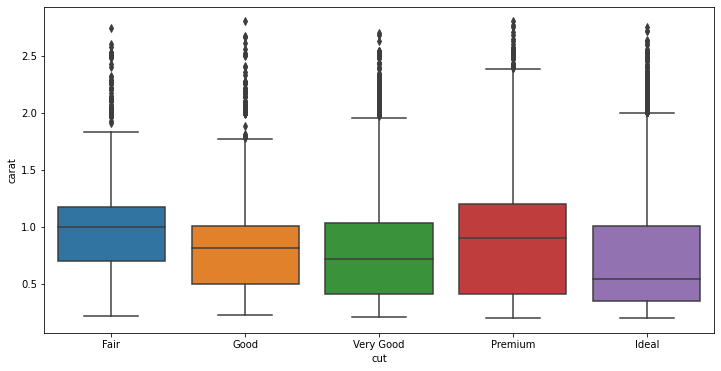

In [338]:
filt_carat = diamonds['carat'] < 3
diamonds_carat = diamonds[filt_carat]
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x="cut", y="carat", data = diamonds_carat, order = cut_order);

This box graph shows why the 'Fair' and 'Premium' cuts have a higher average price. The diamonds with these kind of cuts have a higher carat (about 1), that makes them more valuable.

## ANALYSIS COLOR vs CLARITY

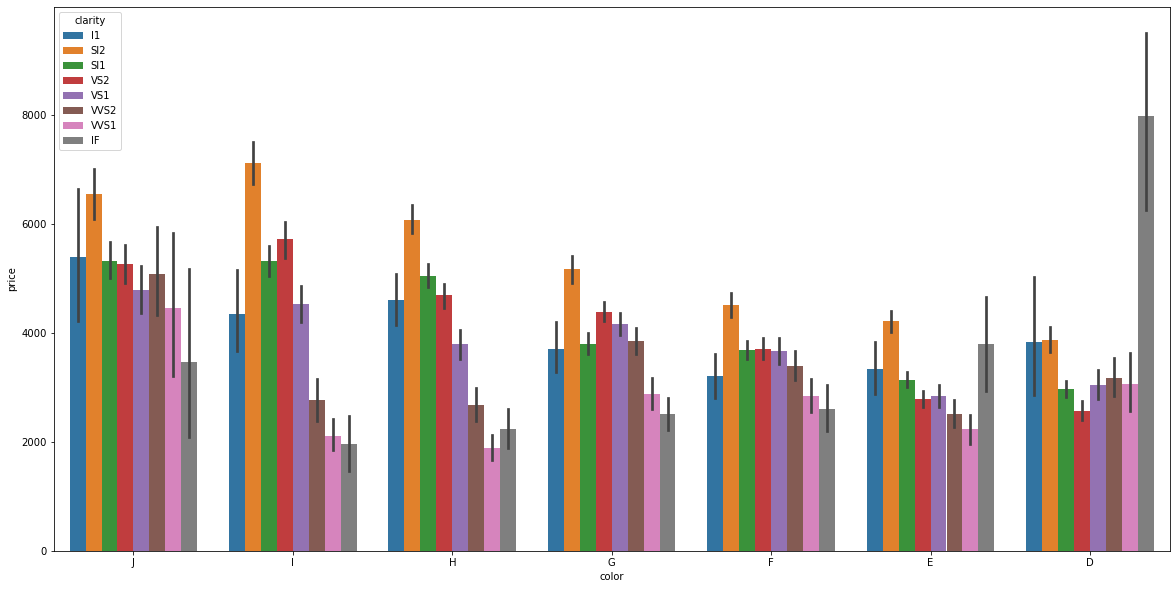

In [339]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data= diamonds, x= 'color', y= 'price', hue= 'clarity', ax = ax, order = color_order, hue_order = clarity_order);

In the previous graph it can be seen that diamonds with color 'D' and clarity 'IF' are the most expensive from far.
Is not a strange statement, as color 'D' and clarity 'IF' are the most flawless features. 

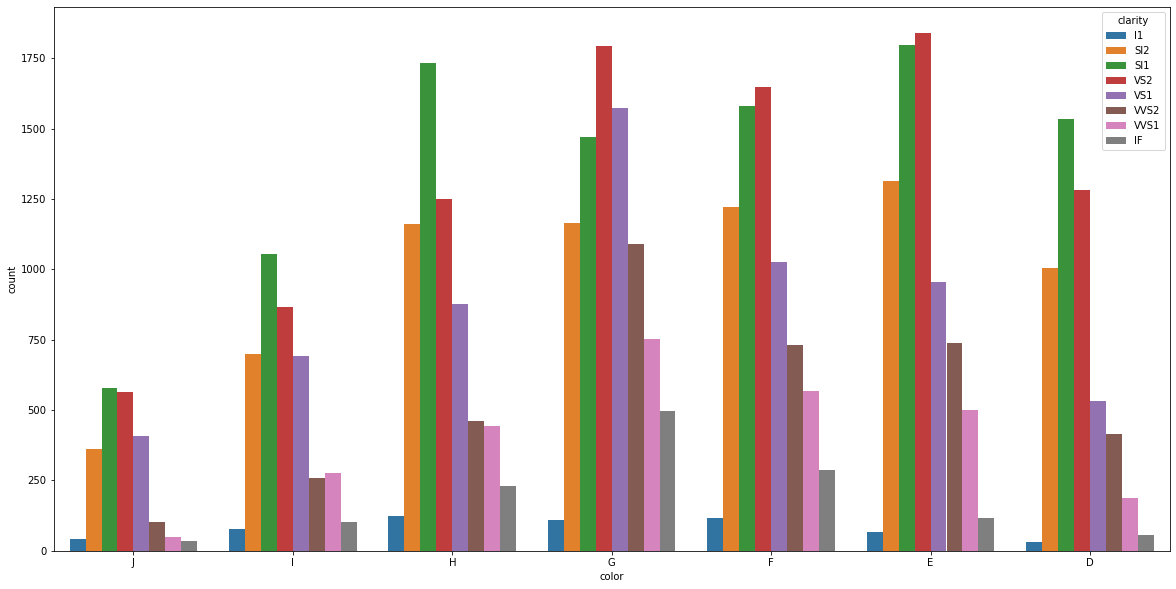

In [340]:
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data= diamonds, x= 'color', hue= 'clarity', ax = ax, order = color_order, hue_order = clarity_order);

The diamonds with color 'D' and clarity 'IF' are very rare, thus their value rise a lot not only for their real value, but for the exclusiveness.

Let's study this fact, filtering thouse diamonds and analysing what difference them.

In [341]:
filt_color_D = diamonds['color'] == 'D'
filt_clarity_IF = diamonds['clarity'] == 'IF'
diamonds_d_if = diamonds[filt_color_D & filt_clarity_IF]
diamonds_d_if.describe()

,carat,depth,table,price,x,y,z,volume
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,0.692364,61.440000,57.290909,7970.054545,5.569636,5.589273,3.428545,113.846933
std,0.296367,1.239265,1.901975,6376.945250,0.836419,0.846542,0.524120,48.356293
min,0.270000,58.600000,53.000000,893.000000,4.150000,4.120000,2.580000,44.112840
25%,0.465000,60.650000,56.000000,2346.000000,4.990000,5.010000,3.015000,77.182339
50%,0.590000,61.500000,57.000000,4293.000000,5.450000,5.490000,3.320000,99.336060
75%,1.020000,62.400000,59.000000,15225.000000,6.390000,6.420000,4.005000,163.937938
max,1.140000,63.400000,61.000000,18542.000000,6.830000,6.900000,4.080000,191.335620


Nothing special can be seen, as the data is relatively similar to the total population.

Let's check the carat for cut 'D', comparing the type of clarity.

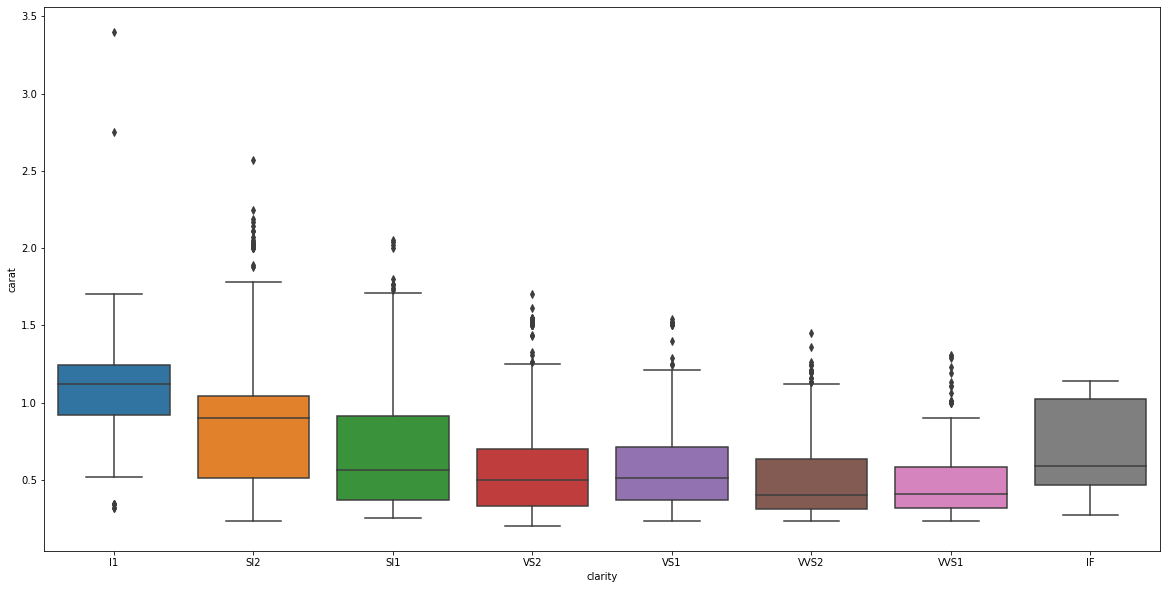

In [342]:
f, ax = plt.subplots(figsize=(20, 10))
diamonds_d = diamonds[filt_color_D]
sns.boxplot(x="clarity", y="carat", data = diamonds_d, order = clarity_order);

The clarity types 'I1' and 'SI2' have the higher average carat, what surely is the cause of their high average price (higher than other 'better'clarity types).

Clarity type 'IF' have an average carat not as big as previous types, but the range of values is very wide. This fact could help the price to rises.

A quick analysis of the cut for this group of diamonds can be done to make sure the conclusions.

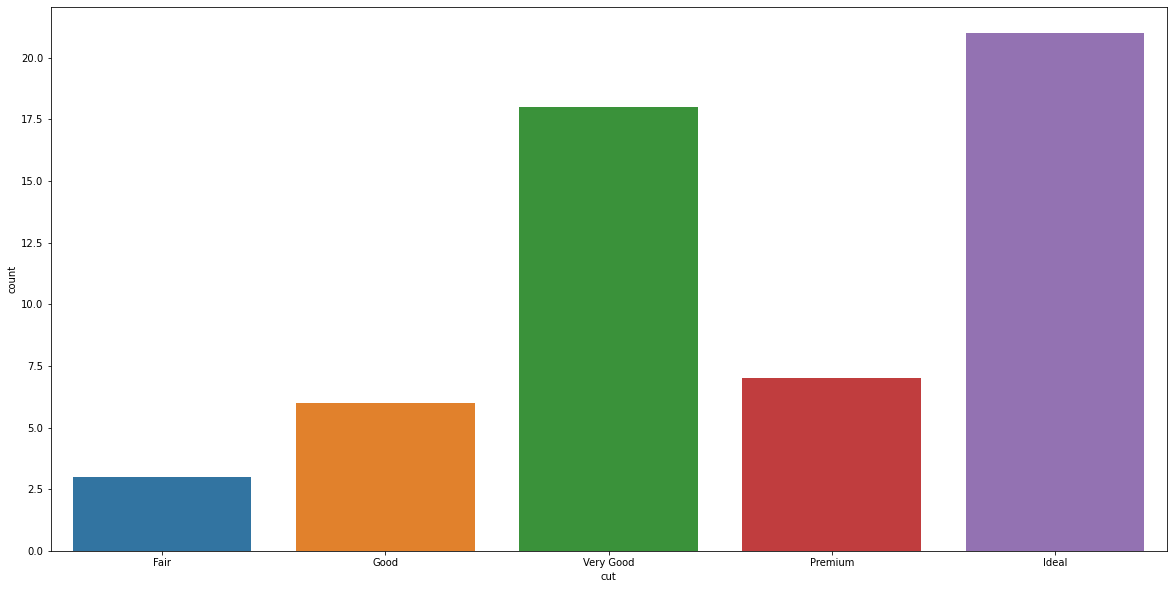

In [344]:
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data= diamonds_d_if, x= 'cut', ax = ax, order = cut_order);

It can be seen that diamonds with cut 'D' and clarity 'IF' have mostly an 'Ideal' cut, which is the mos high-quality, thus the high prices are just.

Therefore, as a conclusion, **the diamonds with cut 'D' and clarity 'IF' are the most expensive, as they have mostly the best cut ('Ideal'), have a relatively high carat and they low quantity available.**

## STUDY OF CARAT


Generally, for common people not involved in the world of diamonds, the carat is the best known property as the one that quantifies the value of a diamond. Let's check if this statement is true.

In the graph of carat vs price, it could be seen that it has a lineal relationship. 

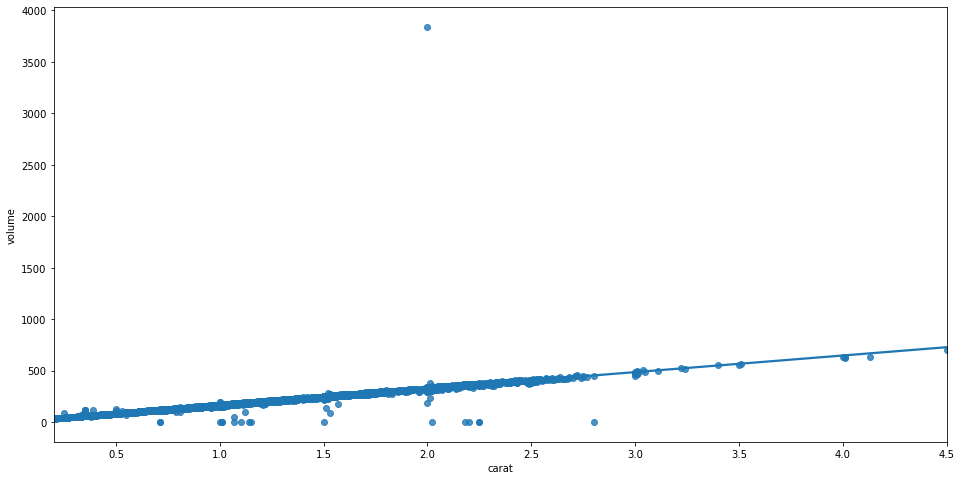

In [346]:
fig, ax = plt.subplots(figsize = (16,8))
sns.regplot(data=diamonds, x="carat", y="volume", ax = ax);

In [347]:
#Filtering the outliers to have a better conclusion
filt_car_vol1 = diamonds['volume'] < 600
filt_car_vol2 = diamonds['carat'] < 4
filt_car_vol = filt_car_vol1 & filt_car_vol2
diamonds_car_vol = diamonds[filt_car_vol]

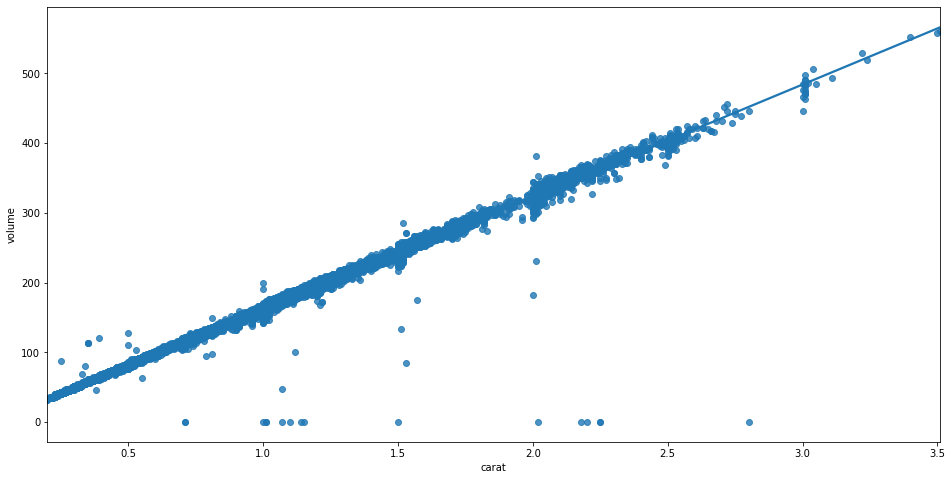

In [348]:
fig, ax = plt.subplots(figsize = (16,8))
sns.regplot(data=diamonds_car_vol, x="carat", y="volume", ax = ax);

We can see that the carat has a clear lineal relationship with the volume, so the greater the volume, the greater the carat. In addition we can confirm that all the diamods have aproximatly the same density.

As we have seen in previous analysis (color vs cut and color vs clarity), the value of the carat in a diamond is a decisive factor in calculating its price. Thus it **is reasonable and justified that ordinary people consider the carat as the most important feature in a diamond**. 

## STUDY OF TABLE

At a first sight, the table does not seem to be a determining factor to choose a diamond.

However, for professionals in the field it is well known that each cut has a specific table that makes them more brilliant.

An study of the table can be done to confirm if there is any relationship with an specific feature.

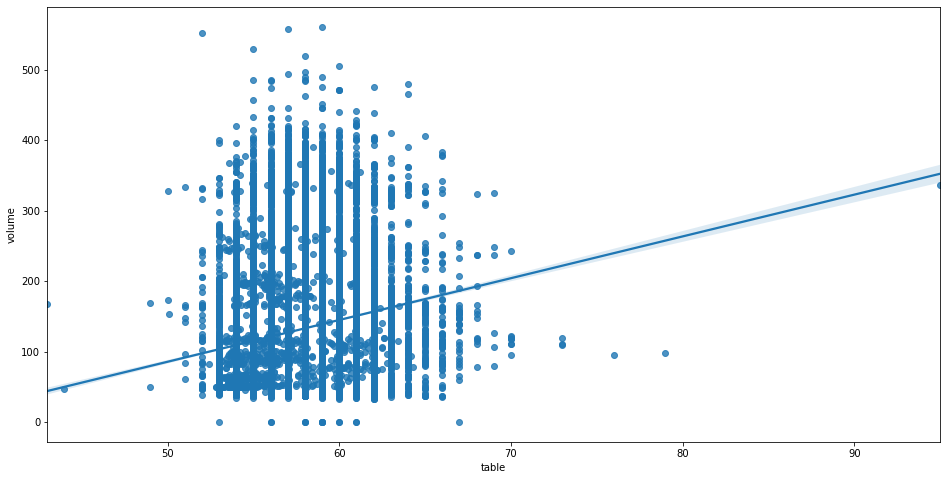

In [349]:
#Comparing table vs volume
fig, ax = plt.subplots(figsize = (16,8))
sns.regplot(data=diamonds_car_vol, x="table", y="volume", ax = ax);

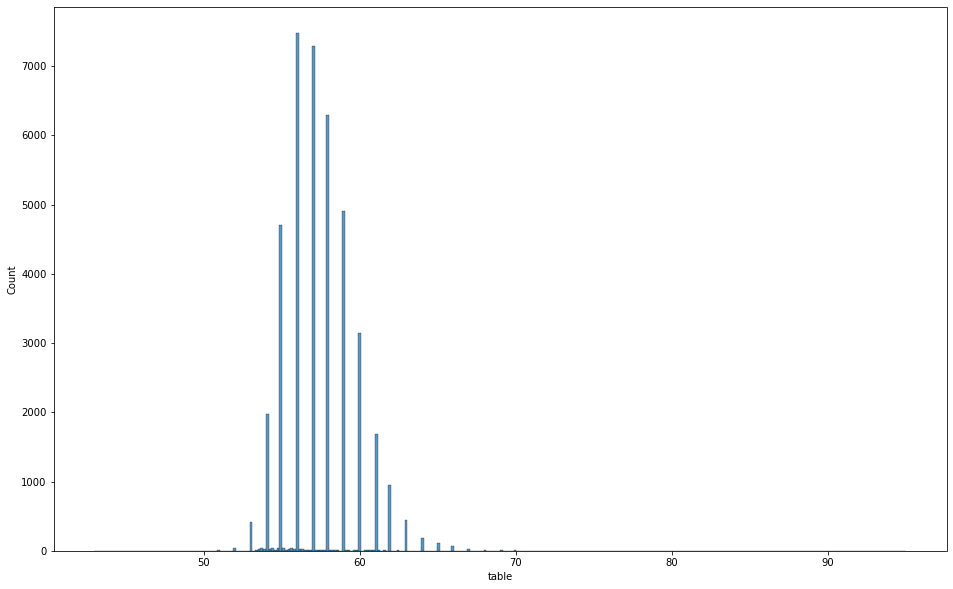

In [350]:
#Checking the distribution of table
f, ax = plt.subplots(figsize=(16, 10))
sns.histplot(data=diamonds, x="table", ax = ax);

In [351]:
#Filtering the outliers to have a better visualization
filt_table1 = diamonds['table'] < 70
filt_table2 = diamonds['table'] > 50
filt_table = filt_table1 & filt_table2
diamonds_table = diamonds[filt_table]

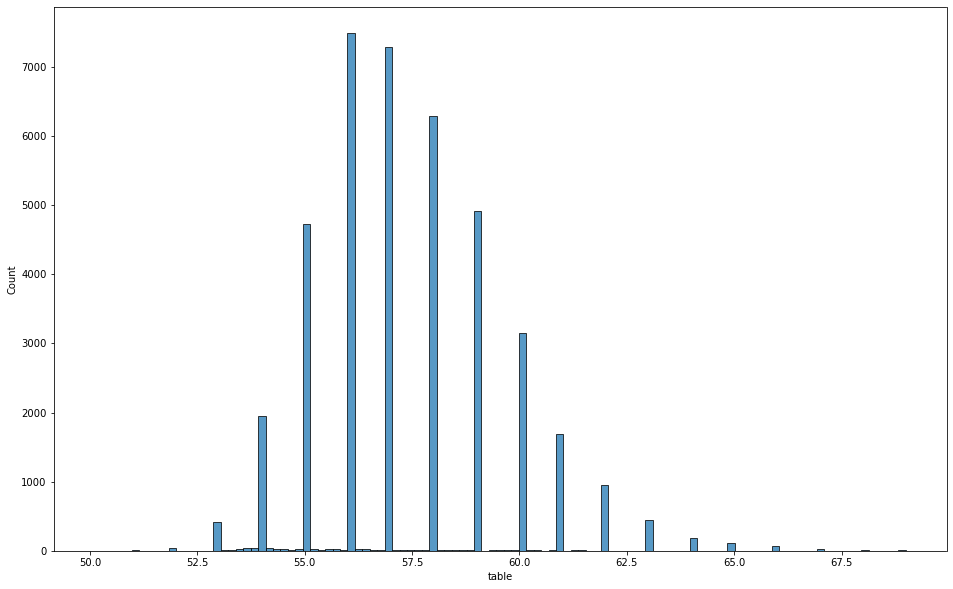

In [352]:
f, ax = plt.subplots(figsize=(16, 10))
sns.histplot(data=diamonds_table, x="table", ax = ax);

Most of the diamonds have a specific table (integer number), let's see which are the most common.

In [353]:
diamonds['table'].value_counts().sort_values(ascending = False).head(15)

56.0    7477
57.0    7282
58.0    6290
59.0    4912
55.0    4699
60.0    3145
54.0    1955
61.0    1690
62.0     947
63.0     444
53.0     418
64.0     189
65.0     107
66.0      68
52.0      45
Name: table, dtype: int64

The table is represented by integer numbers, where the most common are 56-57-58.
Knowing this statement, we can calculate the averge price for each 

In [354]:
table_price = diamonds_table[['table', 'price']].groupby(['table'], as_index = False).agg('mean')

#We keep only most common tables 
filt_table_58 = table_price['table'] < 59
filt_table_55 = table_price['table'] > 55
filt_table_common = filt_table_58 & filt_table_55
diamonds_table_filt = table_price[filt_table_common]

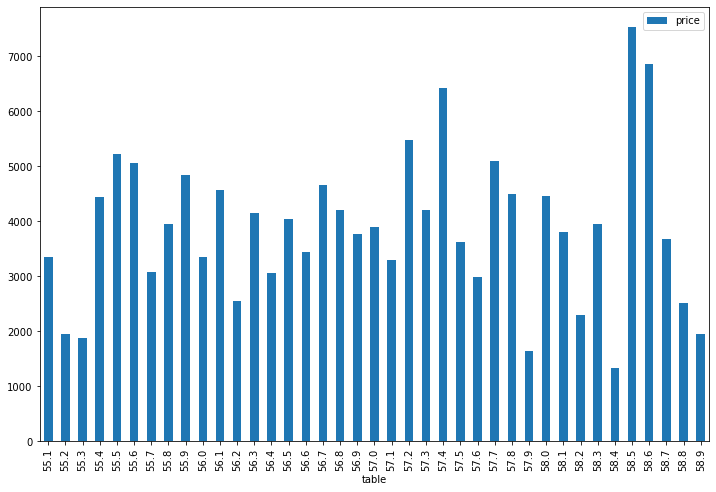

In [355]:
fig, ax = plt.subplots(figsize = (12,8))
diamonds_table_filt.plot.bar(x = 'table', y = 'price', ax = ax);

No clear relationship between the table and the price is observed.

Is known that different cuts requires a specific table to be more valuable. Let's check the relation with this parameter.

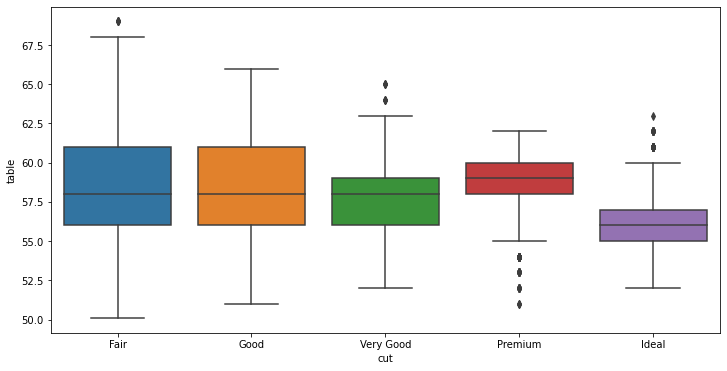

In [356]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x="cut", y="table", data = diamonds_table, order = cut_order);

The average table for less valuable cuts is 58 aproximately, for 'Premium' cut it rises till 59, and for 'Ideal' cut it is reduced to 56.
'Ideal' cut have mostly a table between 55 and 57,5. 'Premium' cut have mostly a table between 58 and 60. The rests of cuts have more variations in their table.

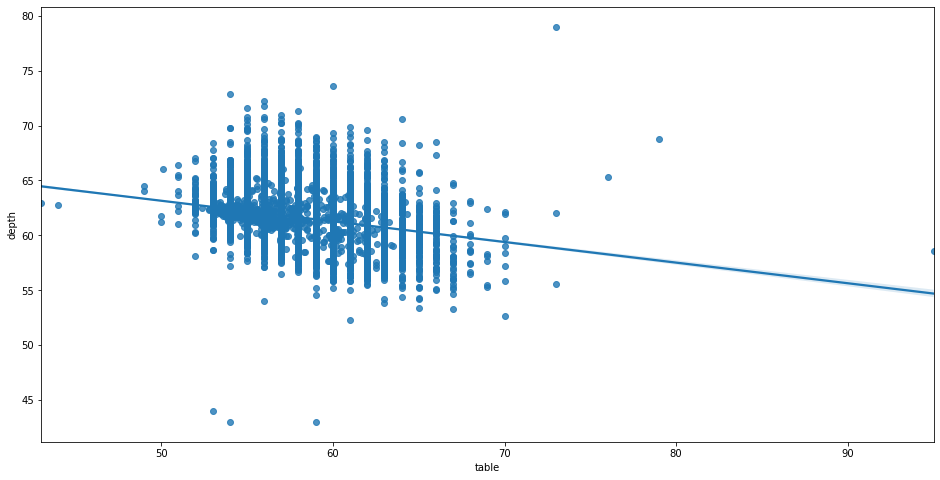

In [367]:
#Comparing table vs depth
fig, ax = plt.subplots(figsize = (16,8))
sns.regplot(data=diamonds, x="table", y="depth", ax = ax);

This graph represents an inverse lineal relationship between table and depth, when the table is increased the depth decreases. 
This inverse formula is used to difine the diamond shape in order to archive the best reflection of light, a more beautiful sparkle and better visual balance.

## CONCLUSIONS

- The price of a diamond is lineal relationed with its carat (and consequently with the volume). This fact justifies why ordinary people consider the carat as the most important feature in a diamond.
- Diamonds with cut 'D' and clarity 'IF' are the most expensive, as they have mostly the best cut ('Ideal'), have a relatively high carat and a low quantity available.
- The table and the depth of a diamond has a inverse lineal relationship. This creates a perfect diamond shape to enhance the shine.

# BONUS